In [1]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi=False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider
from tqdm import tqdm_notebook
from kneeplot import KneePlot 
#import scikitlearn as sklearn

In [2]:
train_acl = pd.read_csv('D:/github/mileswangthesis/train-acl.csv', header=None,
                       names=['Case', 'Abnormal'], 
                       dtype={'Case': str, 'Abnormal': np.int64})

train_acl.head()

case = '0000'

mri_coronal = np.load('D:/github/mileswangthesis/train/coronal/0000.npy')
mri_axial = np.load('D:/github/mileswangthesis/train/axial/0000.npy')
mri_sagittal = np.load('D:/github/mileswangthesis/train/sagittal/0000.npy')

print(f'MRI scan on coronal plane: {mri_coronal.shape}')
print(f'MRI scan on axial plane: {mri_axial.shape}')
print(f'MRI scan on sagittal plane: {mri_sagittal.shape}')

MRI scan on coronal plane: (36, 256, 256)
MRI scan on axial plane: (44, 256, 256)
MRI scan on sagittal plane: (36, 256, 256)


Text(0.5, 1.0, 'Case 0 | Slice 1 | Coronal')

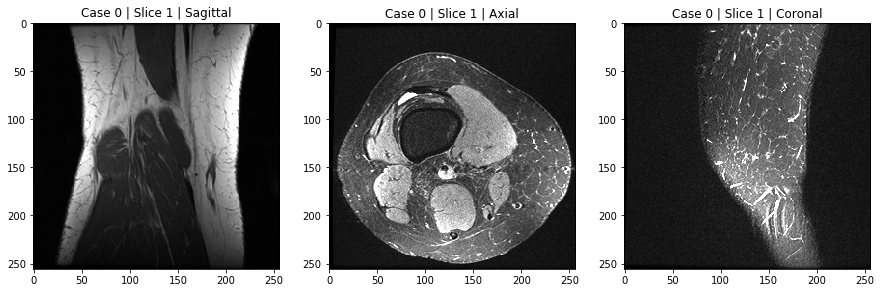

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(mri_coronal[0, :, :], 'gray')
ax1.set_title('Case 0 | Slice 1 | Sagittal')
ax2.imshow(mri_axial[0, :, :], 'gray')
ax2.set_title('Case 0 | Slice 1 | Axial')
ax3.imshow(mri_sagittal[0, :, :], 'gray')
ax3.set_title('Case 0 | Slice 1 | Coronal')

Text(0.5, 1.0, 'Case 0 | Slice 1 | Axial * Noise')

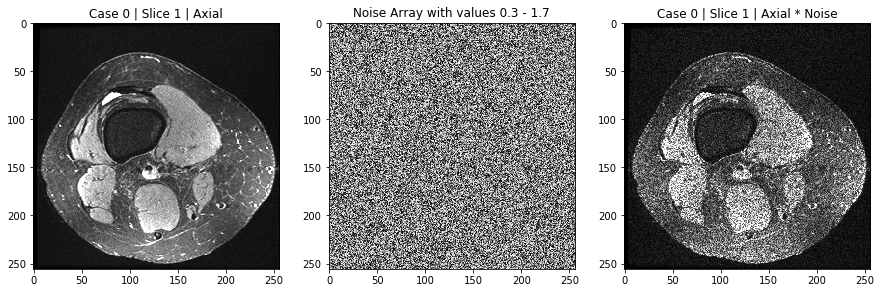

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(mri_axial[0, :, :], 'gray')

ax1.set_title('Case 0 | Slice 1 | Axial')

noise_array = np.random.uniform(0.3,1.7,256*256)
noise_array.resize((256,256))


ax2.imshow(noise_array, 'gray')

ax2.set_title('Noise Array with values 0.3 - 1.7')

vol = np.multiply(mri_axial[0,:,:], noise_array)
vol = np.clip(vol, 0, 255)
vol = vol.astype(np.float32)

ax3.imshow(vol, 'gray')

ax3.set_title('Case 0 | Slice 1 | Axial * Noise')

In [5]:
train_path = 'D:/github/mileswangthesis/train/'


def load_one_stack(case, data_path=train_path, plane='coronal'):
    fpath = '{}/{}/{}.npy'.format(data_path, plane, case)
    return np.load(fpath)

def load_stacks(case, data_path=train_path):
    x = {}
    planes = ['coronal', 'sagittal', 'axial']
    for i, plane in enumerate(planes):
        x[plane] = load_one_stack(case, plane=plane)
    return x

def load_cases(train=True, n=None):
    assert (type(n) == int) and (n < 1250)
    if train:
        case_list = pd.read_csv('D:/github/mileswangthesis/train-acl.csv', names=['case', 'label'], header=None,
                               dtype={'case': str, 'label': np.int64})['case'].tolist()        
    else:
        case_list = pd.read_csv('D:/github/mileswangthesis/valid-acl.csv', names=['case', 'label'], header=None,
                               dtype={'case': str, 'label': np.int64})['case'].tolist()        
    cases = {}

    if n is not None:
        case_list = case_list[:n]

    for case in tqdm_notebook(case_list, leave=False):
        x = load_stacks(case)
        cases[case] = x
    return cases

In [6]:
cases = load_cases(n=1000)

plot = KneePlot(cases)
plot.draw()

interactive(children=(Dropdown(description='Case', options=('0000', '0001', '0002', '0003', '0004', '0005', '0…

In [7]:
# consider doing either unsupervised clustering to see if there are underlying structures in the data that the machine can uncover

In [8]:
# or supervised given that i know there are probably 4 clusters, spectral clustering on k nearest neighbors, optimal transport distance 
# how can i deblur an image for a patient with a tremor, to an optimal quality? interesting question, keep in back of mind





In [9]:
noise_array = np.random.uniform(0.9,1.1,256*256)
            noise_array.resize((256,256))
            
            vol = np.multiply(vol, noise_array)
            vol = np.clip(vol, 0, 255)
            vol = vol.astype(np.float32)

IndentationError: unexpected indent (<ipython-input-9-b225a8729476>, line 2)